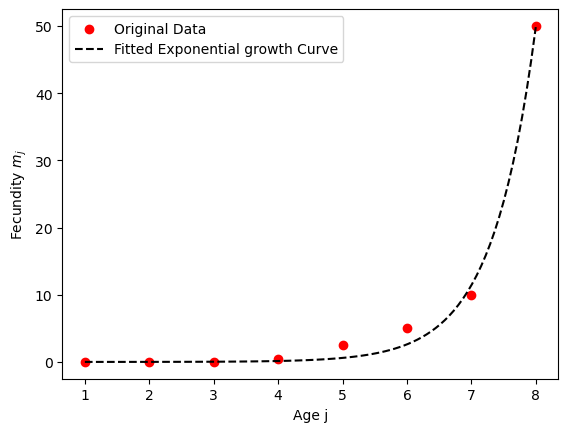

Estimated parameters: a = 0.0004, b = 1.4741


In [1]:
# Figure 3.1
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Age
ages = np.array([1, 2, 3, 4, 5, 6, 7, 8])
# Fecundity data (from the supplementary R code of Reference Giaimo)
fecundity = np.array([0, 0, 0.005, 0.5, 2.5, 5, 10, 50])

# Suppose the exponential growth model
def exp_growth(j, a, b):
    return a * np.exp(b * j)

# Fit the data
popt, pcov = curve_fit(exp_growth, ages, fecundity, p0=(0.001, 0.2))

# Generate the fitted curve
ages_fit = np.linspace(1, 8, 100)
fecundity_fit = exp_growth(ages_fit, *popt)

# Plot the figure
plt.scatter(ages, fecundity, color='red', label="Original Data")
plt.plot(ages_fit, fecundity_fit, color='black', linestyle='--', label="Fitted Exponential growth Curve")
plt.xlabel("Age j")
plt.ylabel("Fecundity $m_j$")
plt.legend()
plt.savefig("plot1.pdf", bbox_inches="tight")  
plt.show()


# Show the estimated parameters
print(f"Estimated parameters: a = {popt[0]:.4f}, b = {popt[1]:.4f}")

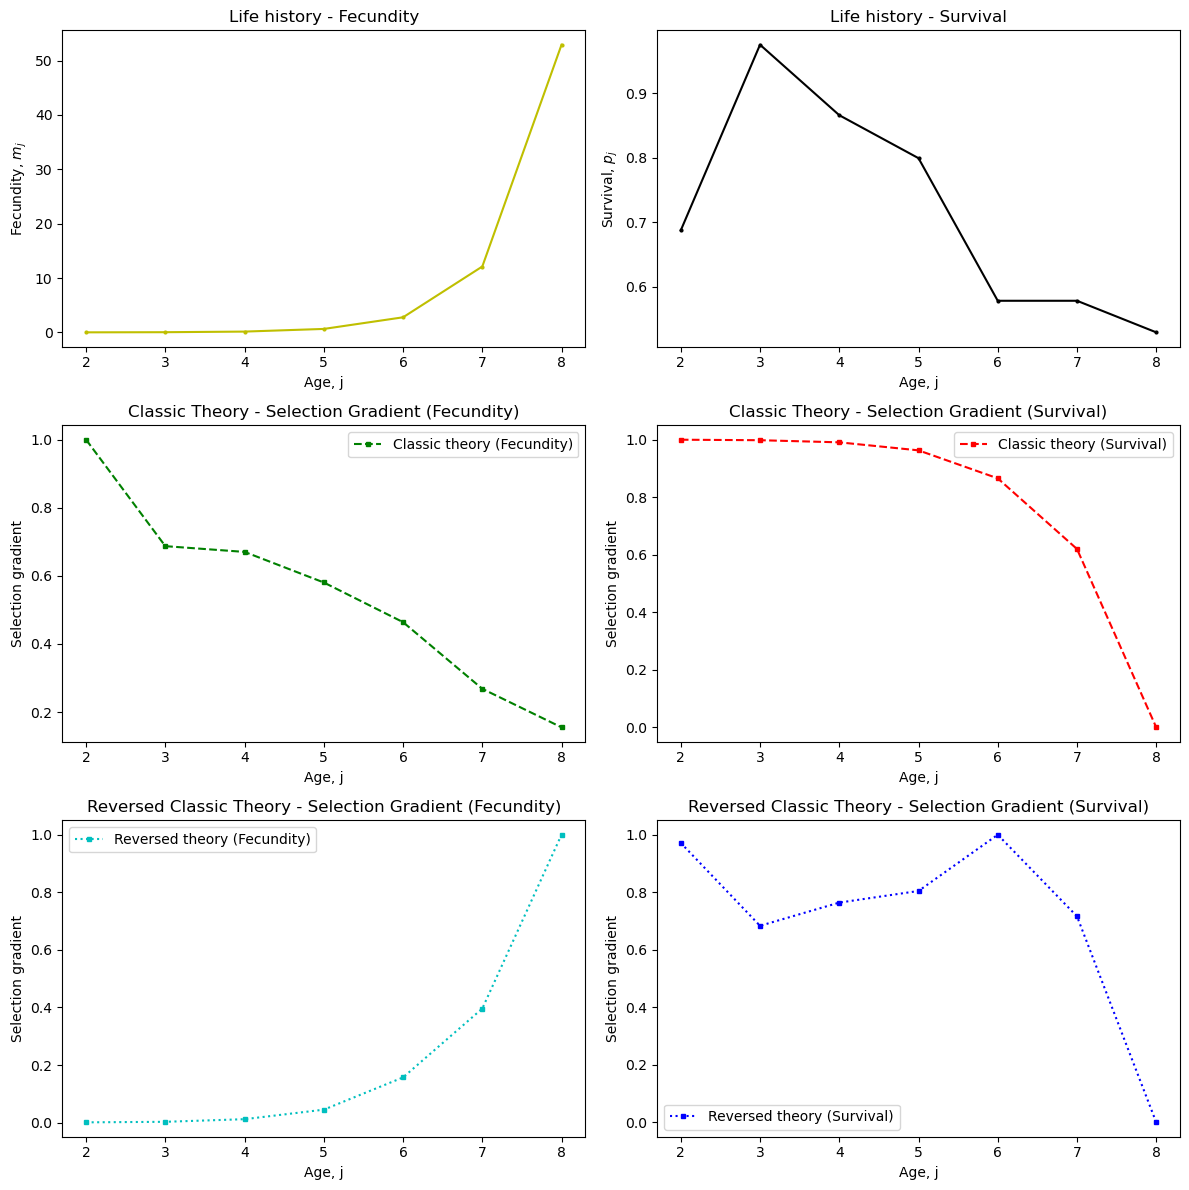

In [6]:
# Figure 3.2
import numpy as np
import matplotlib.pyplot as plt

# Set the range of age
ages = np.arange(2, 9)

# Use the estimated parameters and the exponential growth curve to represent the fecundity
a, b = 0.0004, 1.4741
m_j = np.zeros_like(ages, dtype=float)
m_j[:] = a * np.exp(b * ages[:])

# Get data randomly from the range(0.5 1)
np.random.seed(42) 
p_j = np.round(np.random.uniform(0.5, 1, size=len(ages)), 4)



# Classic theory(additive effects on fecundity, proportional effects on survival)
# Selection gradient of fecundity
def selection_gradient_fecundity(p, j):
    '''
    f_M(m_j) = m
    dw/dm_j = p_0*p_1*...*p_(j-1)
    '''
    return np.prod(p[:j])

# Selection gradient of survival
def selection_gradient_survival(p, m, j):
    '''
    f_P(p_j) = ln(p_j)
    dw/d(ln(p_j)) = sun^inf_(i=j+1) m_i*p_0*p_1*...*p_(i-1)
    '''
    gradient = sum(m[i] * np.prod(p[:i]) for i in range(j + 1, len(p)))
    return gradient

# Get the values of the selection gradient of fecundity and survival(classic theory)
grad_fecundity = []
grad_survival = []
for j in range(len(ages)):
    grad_fecundity_value = selection_gradient_fecundity(p_j, j)
    grad_survival_value = selection_gradient_survival(p_j, m_j, j)
    grad_fecundity.append(grad_fecundity_value)
    grad_survival.append(grad_survival_value)


# Reversed classic theory(proportional effects on fecundity, additive effects on survival)
# Selection gradient of fecundity
def selection_gradient_fecundity_reverse(p, m, j):
    '''
    f_M(m_j) = ln(m_j)
    dw/d(ln(m_j))=m_j*p_0*p_1*...*p_(j-1)
    '''
    return m[j] * np.prod(p[:j])

# Selection gradient of survival
def selection_gradient_survival_reverse(p, m, j):
    '''
    f_P(p_j) = p_j
    dw/dp_j = sum^inf_(i=j+1) m_i*p_0*p_1*...*p_(j-1)*p_(j+1)*...*p_(i-1)
    '''
    gradient = sum(m[i] * np.prod(p[:j]) * np.prod(p[j+1:i]) for i in range(j + 1, len(p)))
    return gradient

# Get the values of the selection gradient of fecundity and survival(reversed classic theory)
grad_fecundity_reverse = []
grad_survival_reverse = []
for j in range(len(ages)):  
    grad_fecundity_value = selection_gradient_fecundity_reverse(p_j, m_j, j)
    grad_survival_value = selection_gradient_survival_reverse(p_j, m_j, j)
    grad_fecundity_reverse.append(grad_fecundity_value)
    grad_survival_reverse.append(grad_survival_value)

# Normalizing selection gradients(not exceed 1)
grad_fecundity /= max(grad_fecundity)
grad_survival /= max(grad_survival)
grad_fecundity_reverse /= max(grad_fecundity_reverse)
grad_survival_reverse /= max(grad_survival_reverse)



# Create a figure with 3*2 subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
fig.subplots_adjust(hspace=1.0, wspace=0.3)

# (1,1) Life history fecundity
axes[0, 0].plot(ages, m_j, 'yo-', markersize=2)
axes[0, 0].set_title("Life history - Fecundity")
axes[0, 0].set_xlabel("Age, j")
axes[0, 0].set_ylabel("Fecundity, $m_j$")

# (1,2) Life history survival
axes[0, 1].plot(ages, p_j, 'ko-', markersize=2)
axes[0, 1].set_title("Life history - Survival")
axes[0, 1].set_xlabel("Age, j")
axes[0, 1].set_ylabel("Survival, $p_j$")

# (2,1) Classic Theory Fecundity selection gradient
axes[1, 0].plot(ages, grad_fecundity, 'g--s', markersize=3, label="Classic theory (Fecundity)")
axes[1, 0].set_title("Classic Theory - Selection Gradient (Fecundity)")
axes[1, 0].set_xlabel("Age, j")
axes[1, 0].set_ylabel("Selection gradient")
axes[1, 0].legend()

# (2,2) Classic Theory Survival selection gradient
axes[1, 1].plot(ages, grad_survival, 'r--s', markersize=3, label="Classic theory (Survival)")
axes[1, 1].set_title("Classic Theory - Selection Gradient (Survival)")
axes[1, 1].set_xlabel("Age, j")
axes[1, 1].set_ylabel("Selection gradient")
axes[1, 1].legend()

# (3,1) Reversed Classic Theory Fecundity selection gradient
axes[2, 0].plot(ages, grad_fecundity_reverse, 'c:s', markersize=3, label="Reversed theory (Fecundity)")
axes[2, 0].set_title("Reversed Classic Theory - Selection Gradient (Fecundity)")
axes[2, 0].set_xlabel("Age, j")
axes[2, 0].set_ylabel("Selection gradient")
axes[2, 0].legend()

# (3,2) Reversed Classic Theory Survival selection gradient
axes[2, 1].plot(ages, grad_survival_reverse, 'b:s', markersize=3, label="Reversed theory (Survival)")
axes[2, 1].set_title("Reversed Classic Theory - Selection Gradient (Survival)")
axes[2, 1].set_xlabel("Age, j")
axes[2, 1].set_ylabel("Selection gradient")
axes[2, 1].legend()

plt.tight_layout()
plt.savefig("plot2.pdf", bbox_inches="tight")  
plt.show()


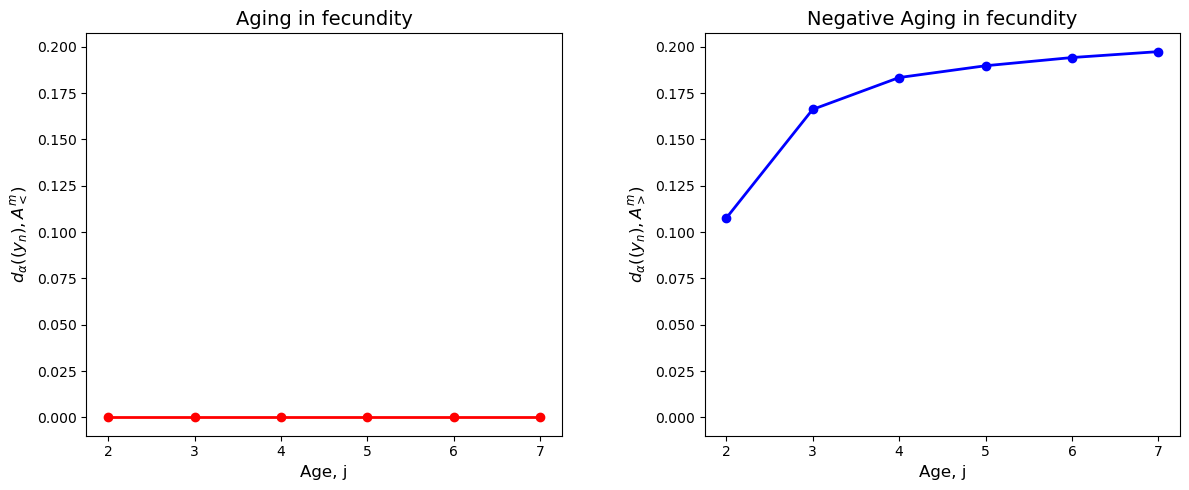

In [2]:
############ This code can be discarded because the following code repeats the method it uses and has a more comprehensive formula ############ 
############ This code can be discarded because the following code repeats the method it uses and has a more comprehensive formula ############ 
############ This code can be discarded because the following code repeats the method it uses and has a more comprehensive formula ############ 
############ This code can be discarded because the following code repeats the method it uses and has a more comprehensive formula ############ 
############ This code can be discarded because the following code repeats the method it uses and has a more comprehensive formula ############ 
# Figure 3.3
import numpy as np
import matplotlib.pyplot as plt
import random

# Set parameters
delta = 0.0001  # additive genetic variance
T_t = 1  # average generation time
num_generations = 50  # evolution time step

# Set the range of age
ages = np.arange(2, 9)

# Generating random increasing fecundity
def fecundity_increasing_set(n=len(ages), start=0, end=5):
    number = []
    x = random.uniform(start, end)  
    number.append(x)

    for i in range(n - 1):  
        x = random.uniform(x, end)  
        number.append(x)

    return number
# Generating random decreasing fecundity
def fecundity_decreasing_set(n=len(ages), start=0, end=5):
    number = []
    x = random.uniform(start, end)  
    number.append(x)

    for i in range(n - 1):  
        x = random.uniform(start, x)  
        number.append(x)

    return number

# Generating increasing & decreasing fecundity array
m_j_increase = np.array(fecundity_increasing_set())  
m_j_decrease = np.array(fecundity_decreasing_set())  

# print(m_j_increase)
# print(m_j_decrease)

# Generating random survival data
np.random.seed(42) 
p_j = np.round(np.random.uniform(0.5, 1, size=len(ages)), 4)

# print(p_j)

# Define the function of fecundity
def f_M(m):
    return m

# Define the inverse function of fecundity
def f_M_inv(x):
    return x  

# Define the derivative function of fecundity
def f_M_deriv(m):
    return 1  

# Define the selection gradient of fecundity dw/dm_j=p_0p_1...p_(j-1)
def selection_gradient_fecundity(m, p, j):
    return np.prod(p[:j])

# Evolutionary simulation
m_j_evolution1 = [m_j_increase.copy()]
m_j_evolution2 = [m_j_decrease.copy()]

for t in range(num_generations):
    new_m_j_inc = np.zeros_like(m_j_increase)

    for j in range(len(ages)):  
        grad_fecundity1 = selection_gradient_fecundity(m_j_increase, p_j, j)  
        f_mj = f_M(m_j_increase[j])
        update_term = delta / (T_t * f_M_deriv(m_j_increase[j])) * grad_fecundity1
        new_m_j_inc[j] = f_M_inv(f_mj + update_term)  

    m_j_increase = new_m_j_inc  
    m_j_evolution1.append(m_j_increase.copy())

m_j_evolution1 = np.array(m_j_evolution1)

for t in range(num_generations):
    new_m_j_dec = np.zeros_like(m_j_decrease)

    for j in range(len(ages)):  
        grad_fecundity2 = selection_gradient_fecundity(m_j_decrease, p_j, j)  
        f_mj = f_M(m_j_decrease[j])
        update_term = delta / (T_t * f_M_deriv(m_j_decrease[j])) * grad_fecundity2
        new_m_j_dec[j] = f_M_inv(f_mj + update_term)  

    m_j_decrease = new_m_j_dec  
    m_j_evolution2.append(m_j_decrease.copy())

m_j_evolution2 = np.array(m_j_evolution2)

# Calculate the fecundity ratio y_j
y_j_inc = m_j_increase[1:] / m_j_increase[:-1]  
y_j_dec = m_j_decrease[1:] / m_j_decrease[:-1]  


# Define the Heaviside step function theta(y_i - 1)
def heaviside_ageing(x):
    return np.where(x >= 1, 1, 0)  

# Define the Heaviside step function theta(-(y_i - 1))
def heaviside_neg_ageing(x):
    return np.where(x <= 1, 1, 0)  

# Calculate the distance between evolving fecundity and the set A_<^m of life histories(ageing in fecundity)
def compute_distance(y_values, alpha):
    indices = np.arange(alpha, alpha + len(y_values))  
    term1 = heaviside_ageing(y_values - 1) / (2 ** indices)  
    term2 = np.abs(y_values - 1) / (1 + np.abs(y_values - 1))  
    return np.sum(term1 * term2)  

# Calculate the distance between evolving fecundity and the set A_>^m of life histories(negative ageing in fecundity)
def compute_distance_neg(y_values, alpha):
    indices = np.arange(alpha, alpha + len(y_values))  
    term1 = heaviside_neg_ageing(y_values - 1) / (2 ** indices)  
    term2 = np.abs(y_values - 1) / (1 + np.abs(y_values - 1)) 
    return np.sum(term1 * term2) 

# Calculate d_alpha for each year 
alpha_values = np.arange(2, len(y_j_inc) + 2)  
d_alpha_inc_values = [compute_distance(y_j_inc[:i], 2) for i in range(1, len(y_j_inc) + 1)]     # y_j > 1
d_alpha_dec_values = [compute_distance_neg(y_j_dec[:i], 2) for i in range(1, len(y_j_dec) + 1)]    # y_j < 1

# Create a figure with 1*2 subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# (0, 1) ageing in fecundity
axes[0].plot(alpha_values, d_alpha_inc_values, marker='o', linestyle='-', color='red', lw=2)
axes[0].set_xlabel("Age, j", fontsize=12)
axes[0].set_ylabel(r"$d_{\alpha} ((y_n), A^m_<)$", fontsize=12)
axes[0].set_title("Aging in fecundity", fontsize=14)

# (1, 1) negative ageing in fecundity
axes[1].plot(alpha_values, d_alpha_dec_values, marker='o', linestyle='-', color='blue', lw=2)
axes[1].set_xlabel("Age, j", fontsize=12)
axes[1].set_ylabel(r"$d_{\alpha} ((y_n), A^m_>)$", fontsize=12)
axes[1].tick_params(labelleft=True)
axes[1].set_title("Negative Aging in fecundity", fontsize=14)


plt.tight_layout()
plt.subplots_adjust(wspace=0.3)
plt.savefig("plot3.pdf", bbox_inches="tight")  
plt.show()



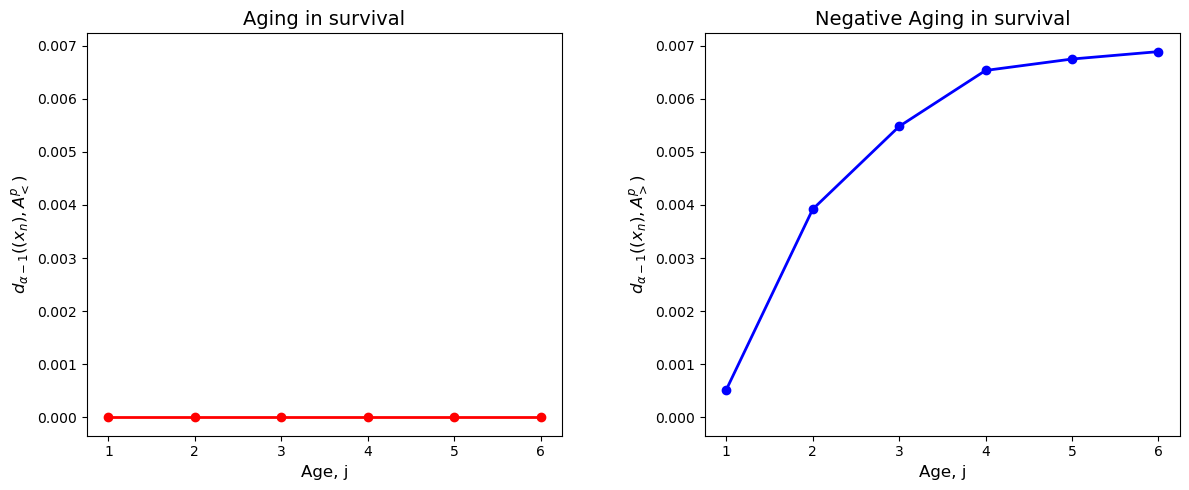

In [107]:
############ KEEP THIS CODE If you need to choose between the latter two codes ############
############ KEEP THIS CODE If you need to choose between the latter two codes ############
############ KEEP THIS CODE If you need to choose between the latter two codes ############
############ KEEP THIS CODE If you need to choose between the latter two codes ############
############ KEEP THIS CODE If you need to choose between the latter two codes ############
# Figure 3.4
import numpy as np
import matplotlib.pyplot as plt
import random

# Set parameters
delta = 0.0001  # Additive genetic variance
T_t = 1  # Average generation time
num_generations = 50  # Evolution time step

# Set the range of age
ages = np.arange(2, 9)

# Generating random increasing survival
def survival_increasing_set(n=len(ages), start=0.5, end=1):
    number = []
    x = random.uniform(start, end)
    number.append(x)
    for i in range(n - 1):
        x = random.uniform(x, end)
        number.append(x)
    return number

# Generating random decreasing survival
def survival_decreasing_set(n=len(ages), start=0.5, end=1):
    number = []
    x = random.uniform(start, end)
    number.append(x)
    for i in range(n - 1):
        x = random.uniform(start, x)
        number.append(x)
    return number

# Generating increasing & decreasing survival array
p_j_increase = np.array(survival_increasing_set())  
p_j_decrease = np.array(survival_decreasing_set())  

# Use the estimated parameters and the exponential growth curve to represent the fecundity
a, b = 0.0004, 1.4741
m_j = np.zeros_like(ages, dtype=float)
m_j[:] = a * np.exp(b * ages[:])

# Define the function of survival
def f_P(p):
    return np.log(p)

# Define the inverse function of survival with overflow protection
def f_P_inv(x):
    return np.exp(np.clip(x, -50, 50)) 

# Define the derivative function of survival
def f_P_deriv(p):
    return 1 / p

# Define the selection gradient of survival
def selection_gradient_survival(p, m, j):
    return sum(m[i] * np.prod(p[:i]) for i in range(j + 1, len(p)))

# Evolutionary simulation
p_j_evolution1 = [p_j_increase.copy()]
p_j_evolution2 = [p_j_decrease.copy()]

for t in range(num_generations):
    new_p_j_inc = np.zeros_like(p_j_increase)

    for j in range(len(ages)):
        grad_survival1 = selection_gradient_survival(p_j_increase, m_j, j)
        f_pj = f_P(p_j_increase[j])
        update_term = delta / (T_t * p_j_increase[j] * f_P_deriv(p_j_increase[j])) * grad_survival1
        new_p_j_inc[j] = f_P_inv(f_pj + update_term)

    p_j_increase = new_p_j_inc
    p_j_evolution1.append(p_j_increase.copy())

p_j_evolution1 = np.array(p_j_evolution1)

for t in range(num_generations):
    new_p_j_dec = np.zeros_like(p_j_decrease)

    for j in range(len(ages)):
        grad_survival2 = selection_gradient_survival(p_j_decrease, m_j, j)
        f_pj = f_P(p_j_decrease[j])
        update_term = delta / (T_t * p_j_decrease[j] * f_P_deriv(p_j_decrease[j])) * grad_survival2
        new_p_j_dec[j] = f_P_inv(f_pj + update_term)

    p_j_decrease = new_p_j_dec
    p_j_evolution2.append(p_j_decrease.copy())

p_j_evolution2 = np.array(p_j_evolution2)

# Calculate the survival ratio x_j
x_j_inc = p_j_increase[1:] / p_j_increase[:-1]  
x_j_dec = p_j_decrease[1:] / p_j_decrease[:-1]

# Define Heaviside functions
def heaviside_ageing(x):
    return np.where(x >= 1, 1, 0)

def heaviside_neg_ageing(x):
    return np.where(x <= 1, 1, 0)

# Compute d_alpha values
def compute_distance(x_values, alpha):
    indices = np.arange(alpha, alpha + len(x_values))
    term1 = heaviside_ageing(x_values - 1) / (2 ** indices)
    term2 = np.abs(x_values - 1) / (1 + np.abs(x_values - 1))
    return np.sum(term1 * term2)

def compute_distance_neg(x_values, alpha):
    indices = np.arange(alpha, alpha + len(x_values))
    term1 = heaviside_neg_ageing(x_values - 1) / (2 ** indices)
    term2 = np.abs(x_values - 1) / (1 + np.abs(x_values - 1))
    return np.sum(term1 * term2)

# Calculate d_(alpha-1) for each year
alpha_values = np.arange(1, len(x_j_inc) + 1)
d_alpha_inc_values = [compute_distance(x_j_inc[:i], 1) for i in range(1, len(x_j_inc) + 1)]
d_alpha_dec_values = [compute_distance_neg(x_j_dec[:i], 1) for i in range(1, len(x_j_dec) + 1)]

# Create a figure with 1*2 subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

axes[0].plot(alpha_values, d_alpha_inc_values, marker='o', linestyle='-', color='red', lw=2)
axes[0].set_xlabel("Age, j", fontsize=12)
axes[0].set_ylabel(r"$d_{\alpha-1} ((x_n), A^p_<)$", fontsize=12)
axes[0].set_title("Aging in survival", fontsize=14)

axes[1].plot(alpha_values, d_alpha_dec_values, marker='o', linestyle='-', color='blue', lw=2)
axes[1].set_xlabel("Age, j", fontsize=12)
axes[1].set_ylabel(r"$d_{\alpha-1} ((x_n), A^p_>)$", fontsize=12)
axes[1].tick_params(labelleft=True)
axes[1].set_title("Negative Aging in survival", fontsize=14)

plt.tight_layout()
plt.subplots_adjust(wspace=0.3)
plt.savefig("plot4.pdf", bbox_inches="tight")  
plt.show()
